## Semester 1 Project Submission

Please fill out:
* Student name: 
* Instructor name: 


# Student Name: Neil Dilawari
# Instructor Name: Lera Tsayukova, and Charlie Rice


In [3]:
import pandas as pd

In [6]:
bomDF = pd.read_csv('zippedData/bom.movie_gross.csv')
bomDF.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


# Reading the CSV file from above into a dataframe


In [7]:
tmdbDF = pd.read_csv('zippedData/tmdb.movies.csv')
tmdbDF.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


# Reading CSV file from above into dataframe

In [20]:
tnDF = pd.read_csv('zippedData/tn.movie_budgets.csv')
tnDF

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


# Reading CSV file from above into dataframe

# Merging the movie basics, movie ratings table to the dataframe with movie budgets, and then doing some data cleaning by removing dollar signs, commas, and changing data types

In [23]:
basics_and_ratings = pd.read_sql("""
select *
from movie_basics b
inner join
movie_ratings r
on b.movie_id=r.movie_id
""", con)

In [24]:
budget_SQLratings_merge = pd.merge(tnDF, basics_and_ratings, left_on='movie', right_on="primary_title")

In [24]:
tnDF["production_budget"] = tnDF["production_budget"].str.replace("$", "")
tnDF["domestic_gross"] = tnDF["domestic_gross"].str.replace("$", "")
tnDF["worldwide_gross"] = tnDF["worldwide_gross"].str.replace("$", "")



tnDF["production_budget"] = tnDF["production_budget"].str.replace(",", "")
tnDF["domestic_gross"] = tnDF["domestic_gross"].str.replace(",", "")
tnDF["worldwide_gross"] = tnDF["worldwide_gross"].str.replace(",", "")



tnDF["production_budget"] = tnDF["production_budget"].astype(int)
tnDF["domestic_gross"] = tnDF["domestic_gross"].astype(int)
tnDF["worldwide_gross"] = tnDF["worldwide_gross"].astype(float)

AttributeError: Can only use .str accessor with string values!

# Reading TSV file into a dataframe

In [13]:
infoDF = pd.read_csv('zippedData/rt.movie_info.tsv', sep='\t')
infoDF.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


# All the necessary imports; sqlite3 for SQL, matplotlib for Data Viz, and then creating a connection and cursor object

In [4]:
import sqlite3
import matplotlib.pyplot as plt
DBfile = 'zippedData/im.db'
con = sqlite3.connect(DBfile)
cursor = con.cursor()

# Following 3 cells are just selecting all columns from the movie_basics, movie_ratings, and movie_akas tables

In [17]:
pd.read_sql("""
SELECT *
FROM movie_basics
;
""", con)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [18]:
pd.read_sql("""
SELECT *
FROM movie_ratings
;
""", con)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [20]:
pd.read_sql("""
SELECT *
FROM movie_akas
;
""", con)

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0


# Created a variable called Correlation_Data which is a SQL output of the average rating, along with the aggregated average of runtime in minutes, grouped by each interval of average rating

# There was a very large range for numvotes ranging from 5 to 90,000 votes so set a minimum baseline of 100 so the results were not biased or skewed, also lots of missing values in runtime_minutes so only wanted to see results with no null values

In [5]:
Correlation_Data = pd.read_sql("""
SELECT averagerating, AVG(runtime_minutes) AS "Average Runtime"
FROM movie_basics
    JOIN movie_ratings
        USING(movie_id)
WHERE runtime_minutes IS NOT NULL AND numvotes >= 100
GROUP BY averagerating
ORDER BY averagerating DESC
;
""", con)
Correlation_Data

,averagerating,Average Runtime
0,9.9,138.000000
1,9.7,142.000000
2,9.6,119.750000
3,9.5,89.666667
4,9.4,92.363636
...,...,...
84,1.4,85.083333
85,1.3,92.750000
86,1.2,84.214286
87,1.1,92.666667


# This is where we conducted our Hypothesis Testing... 

In [11]:
long_movies = Correlation_Data[Correlation_Data["Average Runtime"]>=115.0]["averagerating"]
short_movies = Correlation_Data[Correlation_Data["Average Runtime"]<115.0]["averagerating"]

In [12]:
from scipy import stats
stats.ttest_ind(long_movies, short_movies)

Ttest_indResult(statistic=6.082044445100752, pvalue=3.085579539579667e-08)

# Scatter plot showing the relationship between average runtime and average rating you can see a positive correlation with some outliers at ratings of 9 and higher

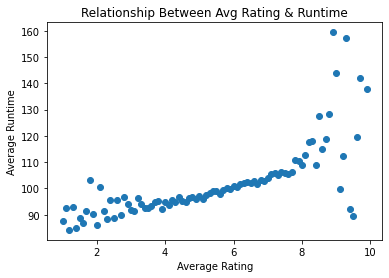

In [6]:
plt.scatter(Correlation_Data['averagerating'], Correlation_Data['Average Runtime'])
plt.xlabel('Average Rating')
plt.ylabel('Average Runtime')
plt.title('Relationship Between Avg Rating & Runtime')
plt.show()

In [25]:
budget_SQLratings_merge

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",tt1775309,Avatar,Abatâ,2011,93.0,Horror,tt1775309,6.1,43
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",tt1298650,6.6,447624
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",tt6565702,6.0,24451
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",tt2395427,7.3,665594
4,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",tt4154756,8.5,670926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2870,62,"Dec 31, 2014",Stories of Our Lives,"$15,000",$0,$0,tt3973612,Stories of Our Lives,Stories of Our Lives,2014,60.0,Drama,tt3973612,7.5,85
2871,68,"Jul 6, 2001",Cure,"$10,000","$94,596","$94,596",tt1872026,Cure,Cure,2011,93.0,Drama,tt1872026,4.9,11
2872,73,"Jan 13, 2012",Newlyweds,"$9,000","$4,584","$4,584",tt1880418,Newlyweds,Newlyweds,2011,95.0,"Comedy,Drama",tt1880418,6.4,1436
2873,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,tt7837402,Red 11,Red 11,2019,77.0,"Horror,Sci-Fi,Thriller",tt7837402,5.6,43
